In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
df= pd.read_csv('HousingPrices.csv')

In [3]:
df.head(10)

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
1,8960,?,4,4,yes,no,no,no,yes,3,furnished,12250000
2,?,3,2,2,yes,no,yes,no,no,2,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,11410000
5,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished,10850000
6,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished,10150000
7,16200,5,3,?,yes,no,no,no,no,0,unfurnished,10150000
8,8100,4,1,2,yes,yes,yes,no,yes,2,furnished,9870000
9,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished,9800000


In [4]:
df.describe()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
count,545,545,545,545,545,545,545,545,545,545,545,545
unique,280,7,5,5,2,2,2,2,2,5,3,220
top,6000,3,1,2,yes,no,no,no,no,0,semi-furnished,4200000
freq,24,297,398,233,468,448,354,520,373,296,227,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              545 non-null    object
 1   Bedrooms          545 non-null    object
 2   Bathrooms         545 non-null    object
 3   Stories           545 non-null    object
 4   Mainroad          545 non-null    object
 5   Guestroom         545 non-null    object
 6   Basement          545 non-null    object
 7   Hotwaterheating   545 non-null    object
 8   Airconditioning   545 non-null    object
 9   Parking           545 non-null    object
 10  Furnishingstatus  545 non-null    object
 11  Price             545 non-null    object
dtypes: object(12)
memory usage: 51.2+ KB


In [6]:
df.dtypes

Area                object
Bedrooms            object
Bathrooms           object
Stories             object
Mainroad            object
Guestroom           object
Basement            object
Hotwaterheating     object
Airconditioning     object
Parking             object
Furnishingstatus    object
Price               object
dtype: object

In [7]:
# Checking which columns contains "?"
columns_with_question_mark = df.columns[(df == "?").any()].tolist()

if columns_with_question_mark:
    print(f"The following columns contain '?': {columns_with_question_mark}")
else:
    print("No columns contain '?'.")

The following columns contain '?': ['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'Price']


In [8]:
#Replacing "?" with NaN
df["Area"] = df["Area"].replace("?", np.nan)
df["Bedrooms"] = df["Bedrooms"].replace("?", np.nan)
df["Bathrooms"] = df["Bathrooms"].replace("?", np.nan)
df["Stories"] = df["Stories"].replace("?", np.nan)
df["Parking"] = df["Parking"].replace("?", np.nan)
df["Price"] = df["Price"].replace("?", np.nan)

In [9]:
#dropping the rows with NaN values
df.dropna(inplace=True)

In [10]:
df

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,11410000
5,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished,10850000
6,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished,10150000
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,furnished,1750000


In [11]:
#converting the categorical columns to numerical
df["Mainroad"] = df["Mainroad"].map({"yes": 1, "no": 0})
df["Guestroom"] = df["Guestroom"].map({"yes": 1, "no": 0})
df["Basement"] = df["Basement"].map({"yes": 1, "no": 0})
df["Hotwaterheating"] = df["Hotwaterheating"].map({"yes": 1, "no": 0})
df["Airconditioning"] = df["Airconditioning"].map({"yes": 1, "no": 0})

In [12]:
#converting the categorical columns to numerical
df["Area"] = pd.to_numeric(df["Area"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"], errors="coerce")
df["Bedrooms"] = pd.to_numeric(df["Bedrooms"], errors="coerce")
df["Parking"] = pd.to_numeric(df["Parking"], errors="coerce")
df["Stories"] = pd.to_numeric(df["Stories"], errors="coerce")

In [13]:
#converting the categorical columns to numerical
df = pd.get_dummies(df, columns=["Furnishingstatus"])

In [14]:
df.dtypes

Area                               int64
Bedrooms                           int64
Bathrooms                          int64
Stories                            int64
Mainroad                           int64
Guestroom                          int64
Basement                           int64
Hotwaterheating                    int64
Airconditioning                    int64
Parking                            int64
Price                              int64
Furnishingstatus_furnished          bool
Furnishingstatus_semi-furnished     bool
Furnishingstatus_unfurnished        bool
dtype: object

In [15]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Area                               0
Bedrooms                           0
Bathrooms                          0
Stories                            0
Mainroad                           0
Guestroom                          0
Basement                           0
Hotwaterheating                    0
Airconditioning                    0
Parking                            0
Price                              0
Furnishingstatus_furnished         0
Furnishingstatus_semi-furnished    0
Furnishingstatus_unfurnished       0
dtype: int64


Text(0, 0.5, 'Price')

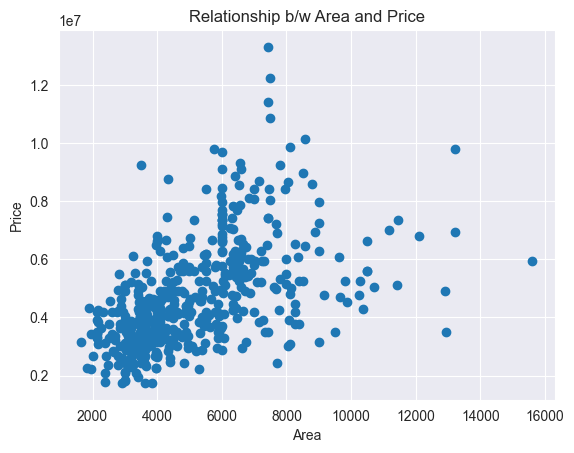

In [16]:
#scatter plot between Area and Price
plt.scatter(df["Area"], df["Price"])
plt.title("Relationship b/w Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")

In [17]:
df.describe()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Price
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.00000,5.080000e+02
mean,5093.925197,2.956693,1.279528,1.795276,0.854331,0.177165,0.350394,0.041339,0.311024,0.67126,4.682834e+06
std,2105.061538,0.733863,0.487126,0.859692,0.353122,0.382185,0.477564,0.199268,0.463369,0.84976,1.795146e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.750000e+06
25%,3562.500000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.428250e+06
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.270000e+06
75%,6352.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,5.600000e+06
max,15600.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,1.330000e+07


Text(0, 0.5, 'Price')

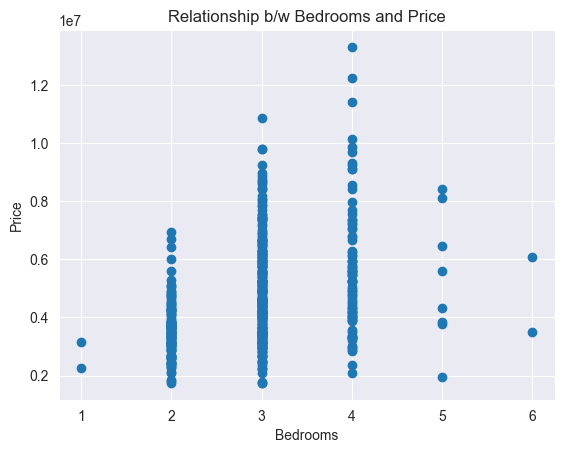

In [18]:
#scatter plot between Bedrooms and Price
plt.scatter(df["Bedrooms"], df["Price"])
plt.title("Relationship b/w Bedrooms and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

Text(0.5, 1.0, 'Correlation b/w Area and Price')

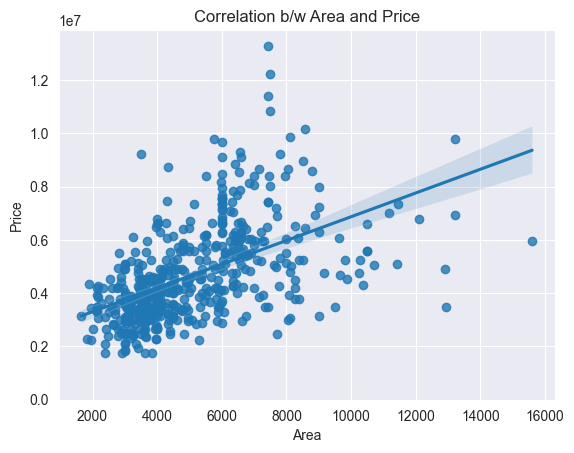

In [19]:
#correlation plot between Area and Price
sns.regplot(x="Area", y = "Price", data=df)
plt.ylim(0,)
plt.xlabel("Area")
plt.title("Correlation b/w Area and Price")

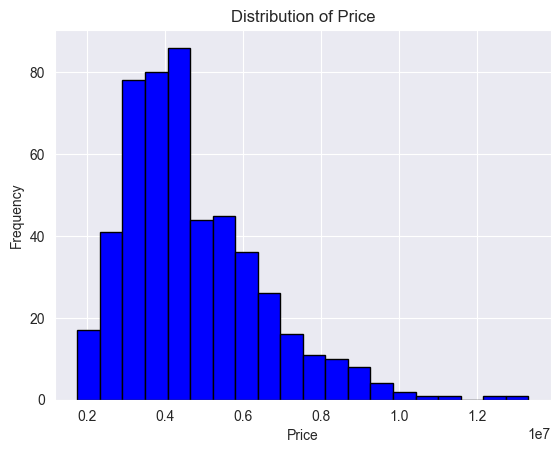

In [20]:
# Histogram for Price
plt.hist(df["Price"], bins=20, color="blue", edgecolor="black")
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

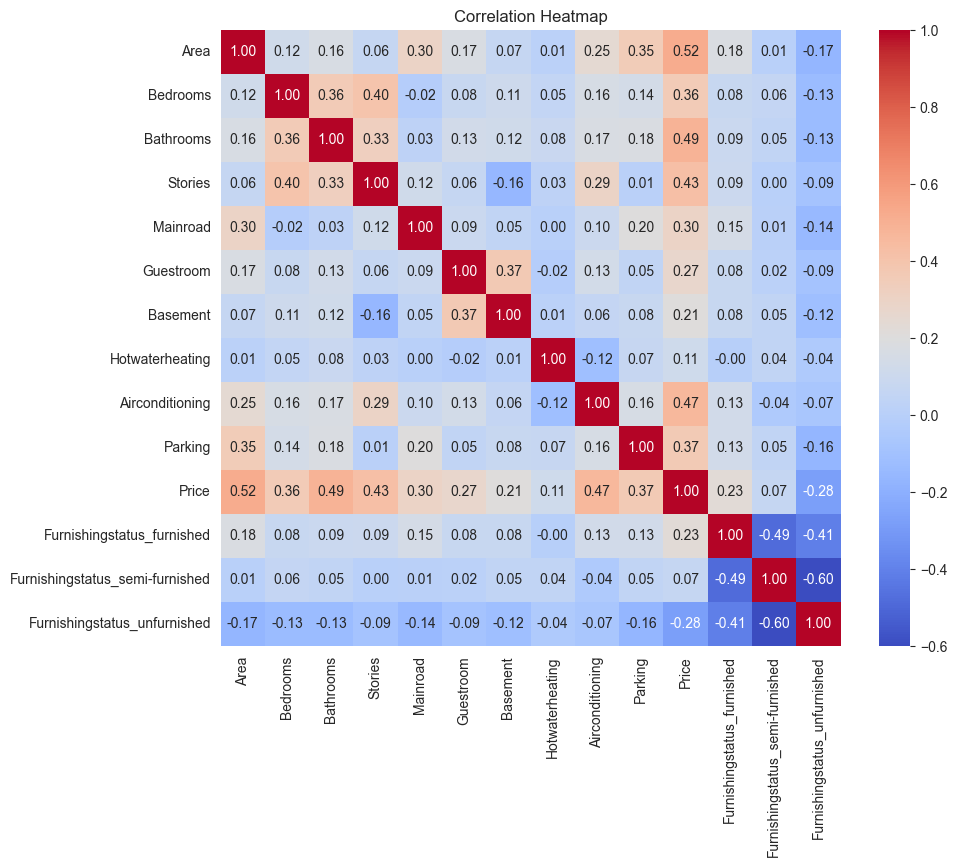

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
#making Price column as the last column
columns = df.columns.tolist()
columns.remove("Price")
columns.append("Price")

# Reorder the DataFrame
df = df[columns]

In [23]:
df

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus_furnished,Furnishingstatus_semi-furnished,Furnishingstatus_unfurnished,Price
0,7420,4,2,3,1,0,0,0,1,2,True,False,False,13300000
3,7500,4,2,2,1,0,1,0,1,3,True,False,False,12215000
4,7420,4,1,2,1,1,1,0,1,2,True,False,False,11410000
5,7500,3,3,1,1,0,1,0,1,2,False,True,False,10850000
6,8580,4,3,4,1,0,0,0,1,2,False,True,False,10150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,False,False,True,1820000
541,2400,3,1,1,0,0,0,0,0,0,False,True,False,1767150
542,3620,2,1,1,1,0,0,0,0,0,False,False,True,1750000
543,2910,3,1,1,0,0,0,0,0,0,True,False,False,1750000


In [24]:
df.shape

(508, 14)

In [25]:
df.dtypes

Area                               int64
Bedrooms                           int64
Bathrooms                          int64
Stories                            int64
Mainroad                           int64
Guestroom                          int64
Basement                           int64
Hotwaterheating                    int64
Airconditioning                    int64
Parking                            int64
Furnishingstatus_furnished          bool
Furnishingstatus_semi-furnished     bool
Furnishingstatus_unfurnished        bool
Price                              int64
dtype: object

In [26]:
#Dividing the data into 2 parts
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [27]:
X

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus_furnished,Furnishingstatus_semi-furnished,Furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,True,False,False
3,7500,4,2,2,1,0,1,0,1,3,True,False,False
4,7420,4,1,2,1,1,1,0,1,2,True,False,False
5,7500,3,3,1,1,0,1,0,1,2,False,True,False
6,8580,4,3,4,1,0,0,0,1,2,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,False,False,True
541,2400,3,1,1,0,0,0,0,0,0,False,True,False
542,3620,2,1,1,1,0,0,0,0,0,False,False,True
543,2910,3,1,1,0,0,0,0,0,0,True,False,False


In [28]:
Y

0      13300000
3      12215000
4      11410000
5      10850000
6      10150000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: Price, Length: 508, dtype: int64

In [29]:
print (X.shape, Y.shape)

(508, 13) (508,)


In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [31]:
#scalling the data
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

print("Scaled Training Data (X):\n", X_train_scaled)
print("Scaled Training Data (Y):\n", Y_train_scaled)

Scaled Training Data (X):
 [[-0.28997898 -1.31876229 -0.57154526 ... -0.56407607  1.17823397
  -0.71758301]
 [ 0.83242219  0.06474544 -0.57154526 ... -0.56407607  1.17823397
  -0.71758301]
 [-0.69451107 -1.31876229 -0.57154526 ... -0.56407607 -0.84872786
   1.393567  ]
 ...
 [-0.52381255 -1.31876229 -0.57154526 ... -0.56407607  1.17823397
  -0.71758301]
 [-1.06864479 -1.31876229 -0.57154526 ... -0.56407607  1.17823397
  -0.71758301]
 [ 0.83242219  0.06474544  1.46395804 ... -0.56407607 -0.84872786
   1.393567  ]]
Scaled Training Data (Y):
 [[-0.61305221]
 [ 0.49569561]
 [-1.30500797]
 [-1.03793732]
 [-0.83561108]
 [-0.95700683]
 [-0.63328483]
 [ 0.94081335]
 [ 1.046023  ]
 [-1.13910045]
 [ 2.42184146]
 [-0.26909759]
 [-1.15933307]
 [-0.75468058]
 [ 2.25998047]
 [-0.57258696]
 [-0.57258696]
 [ 1.30904712]
 [-0.99747207]
 [-1.48305506]
 [-0.15174837]
 [-0.57258696]
 [-0.73444796]
 [-1.28072882]
 [-0.91654158]
 [ 0.33788114]
 [ 2.15881734]
 [-0.22863234]
 [ 1.59230386]
 [-0.75468058]
 [ 0

In [32]:
print(X_train_scaled.shape)
print(Y_train_scaled.shape)

(406, 13)
(406, 1)


In [33]:
print(X_train_scaled.shape)
print(Y_train_scaled.shape)

(406, 13)
(406, 1)


In [34]:
model = linear_model.LinearRegression()

In [35]:
model.fit(X_train_scaled,Y_train_scaled)

LinearRegression()

In [36]:
print("Intercept: \n", model.intercept_)
print("Coefficients: \n", model.coef_)


Intercept: 
 [-2.07522835e-16]
Coefficients: 
 [[ 0.29077325  0.05350713  0.25002231  0.25316919  0.09927123  0.06367823
   0.1413398   0.09114073  0.22260679  0.12528538  0.04239156  0.02535899
  -0.06470891]]


In [37]:
# Training Error
from sklearn.metrics import mean_squared_error

Y_train_pred = model.predict(X_train_scaled)

train_error = mean_squared_error(Y_train_scaled, Y_train_pred)

print("Mean squared error: %.3f" % train_error)

Mean squared error: 0.341


In [38]:
#Test Error
Y_test_pred = model.predict(X_test_scaled)

test_error = mean_squared_error(Y_test_scaled, Y_test_pred)

print("Mean squared error: %.3f" % test_error)

Mean squared error: 0.500


In [39]:
df

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus_furnished,Furnishingstatus_semi-furnished,Furnishingstatus_unfurnished,Price
0,7420,4,2,3,1,0,0,0,1,2,True,False,False,13300000
3,7500,4,2,2,1,0,1,0,1,3,True,False,False,12215000
4,7420,4,1,2,1,1,1,0,1,2,True,False,False,11410000
5,7500,3,3,1,1,0,1,0,1,2,False,True,False,10850000
6,8580,4,3,4,1,0,0,0,1,2,False,True,False,10150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,False,False,True,1820000
541,2400,3,1,1,0,0,0,0,0,0,False,True,False,1767150
542,3620,2,1,1,1,0,0,0,0,0,False,False,True,1750000
543,2910,3,1,1,0,0,0,0,0,0,True,False,False,1750000


In [40]:
 #Predicting price for new data
new_data = [[5000, 3, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]]  # Update with all features
new_data_scaled = scaler_X.transform(new_data)  # Scale the new data

# Predict the scaled price
predicted_price_scaled = model.predict(new_data_scaled)

# Inverse transform to get the actual price
predicted_price = scaler_Y.inverse_transform(predicted_price_scaled.reshape(-1, 1))

print("Predicted Price:", predicted_price[0][0])


Predicted Price: 5055419.536764167


/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
